Import Libraries and Load Data

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
df = pd.read_csv("imdb_movie_dataset.csv")  


In [16]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe 

In [17]:
# Display column names and data types
print("\nColumn information:")
print(df.info())


Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB
None


In [18]:
# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df.describe())


Summary statistics for numerical columns:
              Rank         Year  Runtime (Minutes)       Rating         Votes  \
count  1000.000000  1000.000000        1000.000000  1000.000000  1.000000e+03   
mean    500.500000  2012.783000         113.172000     6.723200  1.698083e+05   
std     288.819436     3.205962          18.810908     0.945429  1.887626e+05   
min       1.000000  2006.000000          66.000000     1.900000  6.100000e+01   
25%     250.750000  2010.000000         100.000000     6.200000  3.630900e+04   
50%     500.500000  2014.000000         111.000000     6.800000  1.107990e+05   
75%     750.250000  2016.000000         123.000000     7.400000  2.399098e+05   
max    1000.000000  2016.000000         191.000000     9.000000  1.791916e+06   

       Revenue (Millions)   Metascore  
count          872.000000  936.000000  
mean            82.956376   58.985043  
std            103.253540   17.194757  
min              0.000000   11.000000  
25%             13.270000  

Data preprocessing

In [19]:
# Checking for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64


Relational Graph

Correlation between Rating and Revenue (Millions): 0.22


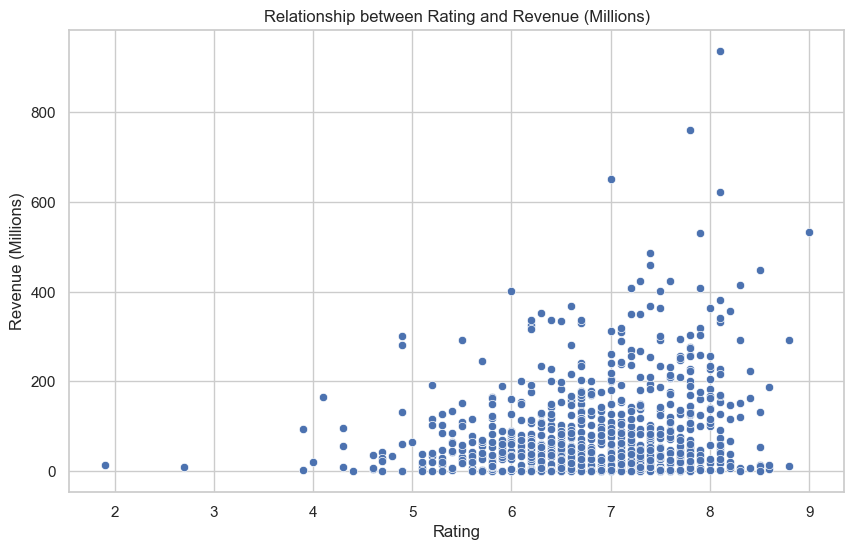

In [29]:
def plot_relationship(data, x_column, y_column):
    # Drop rows with missing values in the specified columns
    data = data[[x_column, y_column]].dropna()

    # Calculate correlation using pandas .corr() method
    correlation = data[x_column].corr(data[y_column])
    print(f"Correlation between {x_column} and {y_column}: {correlation:.2f}")

    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_column, y=y_column, data=data)
    plt.title(f"Relationship between {x_column} and {y_column}")
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

# Assuming df is my DataFrame
# Call the function to plot the relationship between 'Rating' and 'Revenue (Millions)'
plot_relationship(df, 'Rating', 'Revenue (Millions)')

Categorical Graph Quality

C:\Users\DELL\AppData\Local\Temp\ipykernel_3296\853919326.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=genre_series.value_counts().index,


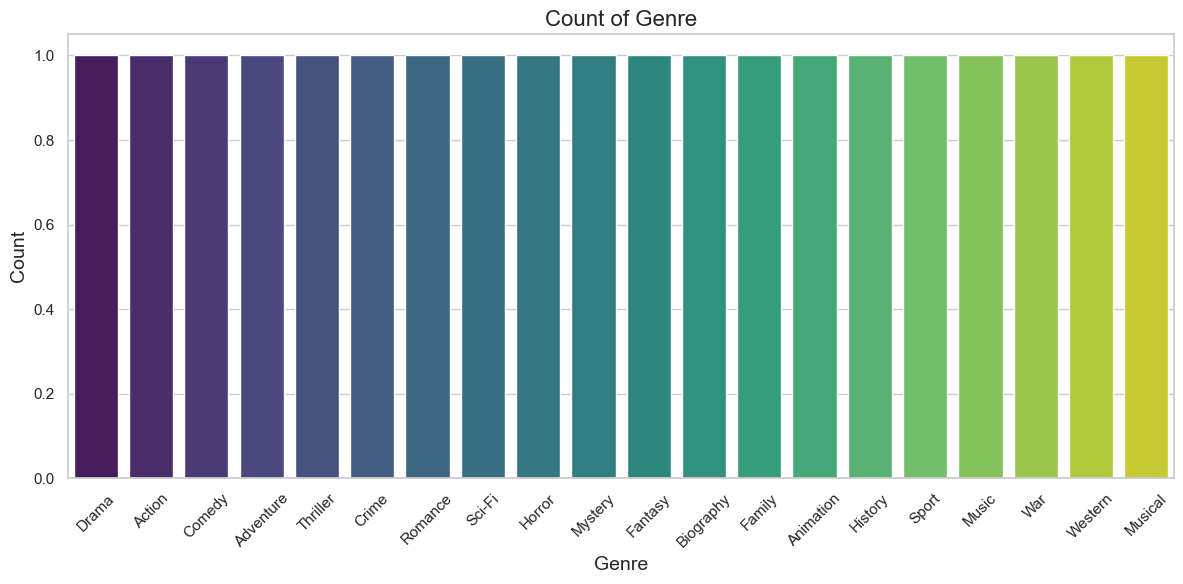

Counts of each genre:
Drama        513
Action       303
Comedy       279
Adventure    259
Thriller     195
Crime        150
Romance      141
Sci-Fi       120
Horror       119
Mystery      106
Fantasy      101
Biography     81
Family        51
Animation     49
History       29
Sport         18
Music         16
War           13
Western        7
Musical        5
Name: count, dtype: int64


In [31]:
def plot_categorical_graph(df, column_name):

    # Handle cases where there are multiple genres listed
    genre_series = df[column_name].str.cat(sep=',').split(',')
    genre_series = pd.Series(genre.strip() for genre in genre_series)
    
    # Set up the aesthetics for the plot
    sns.set(style="whitegrid")

    # Create a count plot for the specified categorical column with customized color
    plt.figure(figsize=(12, 6))
    sns.countplot(x=genre_series.value_counts().index, 
                  order=genre_series.value_counts().index,
                  palette='viridis')  # Using 'viridis' color palette
    plt.title(f'Count of {column_name}', fontsize=16)
    plt.xlabel(column_name, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Plotting a categorical graph for the 'Genre' column
plot_categorical_graph(df, 'Genre')

# Print counts of each genre
genre_counts = df['Genre'].str.cat(sep=',').split(',')
genre_counts_series = pd.Series(genre_counts).value_counts()
print("Counts of each genre:")
print(genre_counts_series)


statistical Graph Quality

C:\Users\DELL\AppData\Local\Temp\ipykernel_3296\3035687376.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_column, y=numerical_column, data=filtered_df,palette="Set2")


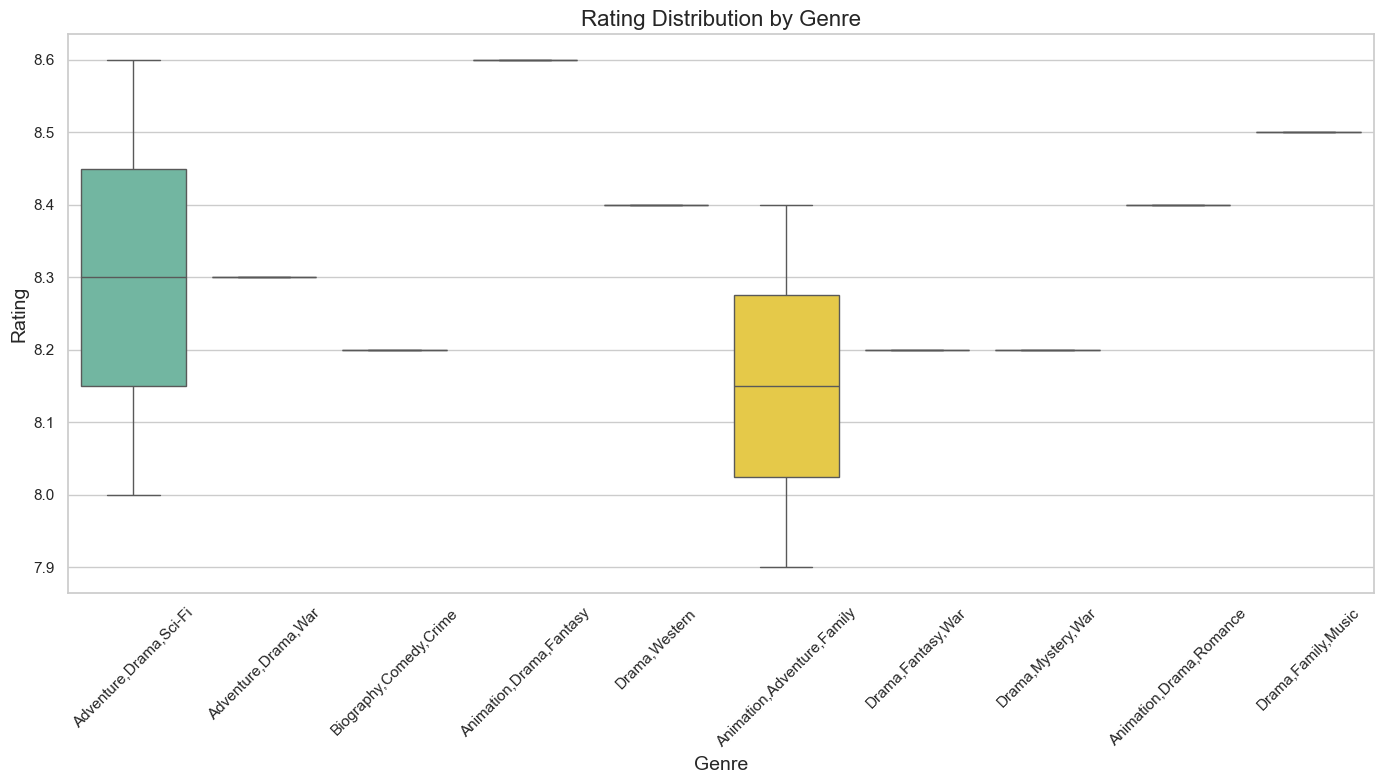

Descriptive statistics for 'Rating' grouped by 'Genre':
                            count  mean       std  min    25%   50%    75%  \
Genre                                                                        
Adventure,Drama,Sci-Fi        2.0  8.30  0.424264  8.0  8.150  8.30  8.450   
Adventure,Drama,War           1.0  8.30       NaN  8.3  8.300  8.30  8.300   
Animation,Adventure,Family    2.0  8.15  0.353553  7.9  8.025  8.15  8.275   
Animation,Drama,Fantasy       1.0  8.60       NaN  8.6  8.600  8.60  8.600   
Animation,Drama,Romance       1.0  8.40       NaN  8.4  8.400  8.40  8.400   
Biography,Comedy,Crime        1.0  8.20       NaN  8.2  8.200  8.20  8.200   
Drama,Family,Music            1.0  8.50       NaN  8.5  8.500  8.50  8.500   
Drama,Fantasy,War             1.0  8.20       NaN  8.2  8.200  8.20  8.200   
Drama,Mystery,War             1.0  8.20       NaN  8.2  8.200  8.20  8.200   
Drama,Western                 1.0  8.40       NaN  8.4  8.400  8.40  8.400   

       

In [37]:
def plot_statistical_graph(df, numerical_column, categorical_column, max_categories=10): 
    # Group by the categorical column and calculate the mean
    category_means = df.groupby(categorical_column)[numerical_column].mean().sort_values(ascending=False)

    # Limit the number of categories to display
    limited_categories = category_means.head(max_categories).index.tolist()
    
    # Filter the DataFrame to include only the limited categories
    filtered_df = df[df[categorical_column].isin(limited_categories)]
    
    # Set up the aesthetics for the plot
    sns.set(style="whitegrid")

    # Create a box plot
    plt.figure(figsize=(14, 8))
    sns.boxplot(x=categorical_column, y=numerical_column, data=filtered_df,palette="Set2")
    plt.title(f'{numerical_column} Distribution by {categorical_column}', fontsize=16)
    plt.xlabel(categorical_column, fontsize=14)
    plt.ylabel(numerical_column, fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Print descriptive statistics for the numerical column grouped by the categorical column
    stats = filtered_df.groupby(categorical_column)[numerical_column].describe()
    print(f"Descriptive statistics for '{numerical_column}' grouped by '{categorical_column}':")
    print(stats)


plot_statistical_graph(df, 'Rating', 'Genre')


Statistical Moments for 'Rank':
Mean: 500.50
Median: 500.50
Standard Deviation: 288.82
Descriptive Statistics for 'Rank':
count    1000.000000
mean      500.500000
std       288.819436
min         1.000000
25%       250.750000
50%       500.500000
75%       750.250000
max      1000.000000
Name: Rank, dtype: float64 

Statistical Moments for 'Year':
Mean: 2012.78
Median: 2014.00
Standard Deviation: 3.21
Descriptive Statistics for 'Year':
count    1000.000000
mean     2012.783000
std         3.205962
min      2006.000000
25%      2010.000000
50%      2014.000000
75%      2016.000000
max      2016.000000
Name: Year, dtype: float64 

Statistical Moments for 'Runtime (Minutes)':
Mean: 113.17
Median: 111.00
Standard Deviation: 18.81
Descriptive Statistics for 'Runtime (Minutes)':
count    1000.000000
mean      113.172000
std        18.810908
min        66.000000
25%       100.000000
50%       111.000000
75%       123.000000
max       191.000000
Name: Runtime (Minutes), dtype: float64 

Stati

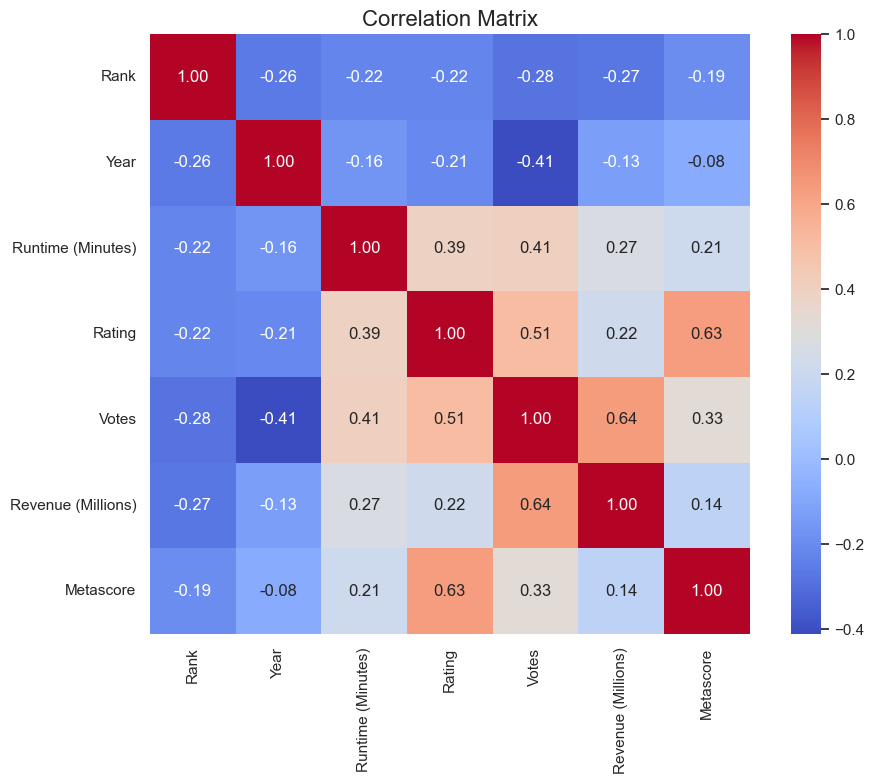

In [38]:
def statistical_summary_all(df):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Iterate through each numerical column
    for numerical_column in numeric_df.columns:
        print(f"Statistical Moments for '{numerical_column}':")
        
        # Calculate basic statistical moments
        mean = numeric_df[numerical_column].mean()
        median = numeric_df[numerical_column].median()
        std_dev = numeric_df[numerical_column].std()


        # Print major moments
        print(f"Mean: {mean:.2f}")
        print(f"Median: {median:.2f}")
        print(f"Standard Deviation: {std_dev:.2f}")
       
        
        # Print descriptive statistics
        print(f"Descriptive Statistics for '{numerical_column}':")
        print(numeric_df[numerical_column].describe(), "\n")

    # Calculate and print the correlation matrix using pandas
    correlation_matrix = numeric_df.corr()
    print("Correlation Matrix:")
    print(correlation_matrix, "\n")
    
    # Visualize the correlation matrix using a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title("Correlation Matrix", fontsize=16)
    plt.tight_layout()
    plt.show()

# Assuming df is your DataFrame
statistical_summary_all(df)